In [2]:
import torch
import jax.numpy as jnp
import numpy as np
import scipy.io as sio
from rpp.rpp_conv import RPPConv, RPPConv_L2
from uci_helpers import uci_loader, uci_reps
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
datasets = ['energy', 'fertility', 'pendulum', 'wine']
nets = ['conv', 'mlp', 'rpp']
conv_wd = str(1e-4)
basic_wd = str(0.01)

In [11]:
def namer(dset, net, trial, cwd, bwd):
    name = "./saved-outputs/"
    name += dset + "/" + net + trial + "_conv_wd" + cwd + "_basic_wd" + bwd + ".pkl"
    return name

In [43]:
full_df = pd.DataFrame()

for dset in datasets:
    for net in nets:
        for trial in range(10):
            fname = namer(dset, net, str(trial), conv_wd, basic_wd)
            df = pd.read_pickle(fname)
            df['dataset'] = dset
            df['net'] = net
            df['trial'] = trial
            full_df = full_df.append(df.iloc[-1])

In [47]:
temp_df = full_df.groupby(['dataset']).transform(lambda x: (x - x.mean()) / x.std())

In [65]:
dset_mean = full_df.groupby('dataset', axis=0).transform('mean')['te_mse']
dset_std = full_df.groupby('dataset', axis=0).transform('std')['te_mse']

full_df['std_te_mse'] = (full_df['te_mse'] - dset_mean)/dset_std

<AxesSubplot:xlabel='dataset', ylabel='std_te_mse'>

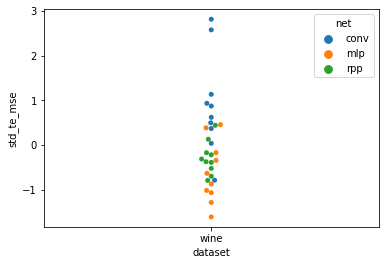

In [66]:
sns.swarmplot(x='dataset', y='std_te_mse', data=full_df[full_df['dataset']=='wine'], hue='net')

<AxesSubplot:xlabel='dataset', ylabel='std_te_mse'>

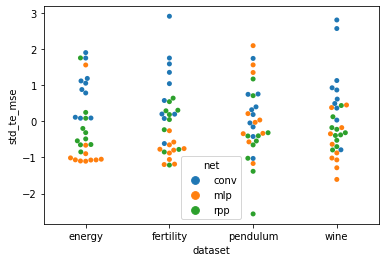

In [67]:
sns.swarmplot(x='dataset', y='std_te_mse', data=full_df, hue='net')

In [69]:
full_df.to_pickle("./uci_plot_df.pkl")